In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
from sklearn.model_selection import train_test_split , GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, classification_report , mean_squared_error
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data

df = pd.read_csv(r"C:\Users\Prerana\Downloads\Fraud_check (1).csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


EDA

In [3]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

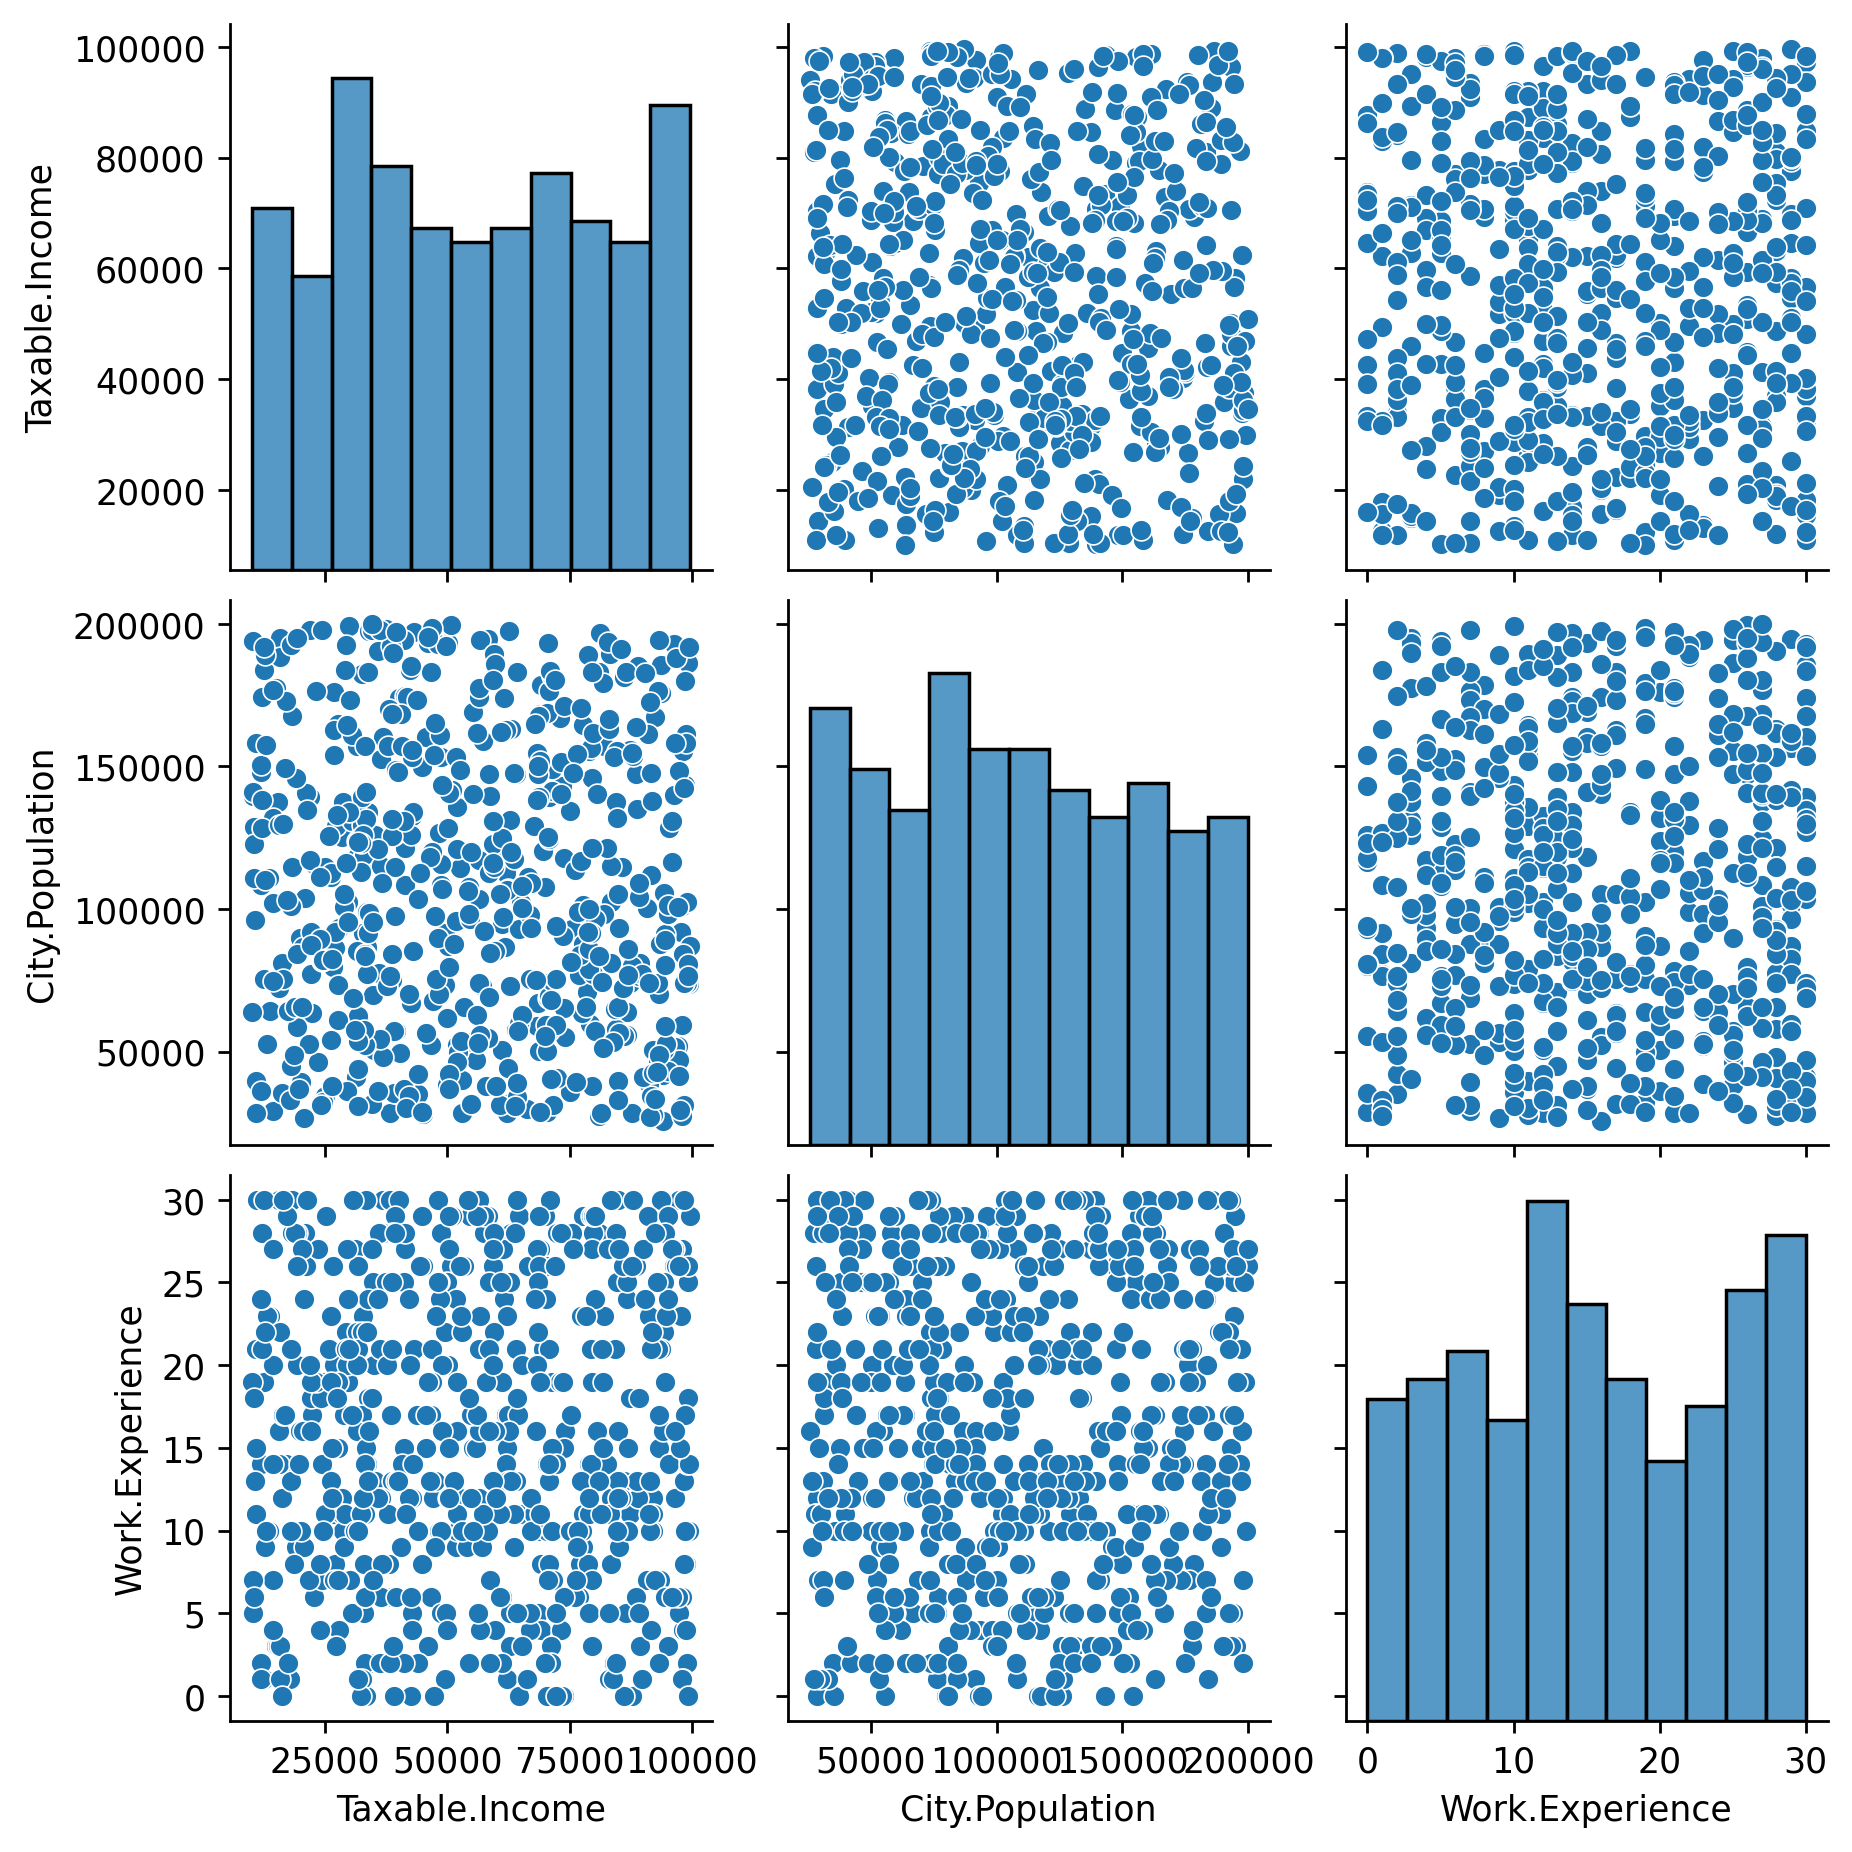

In [6]:
sns.pairplot(df)

In [7]:
#correlation analysis
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

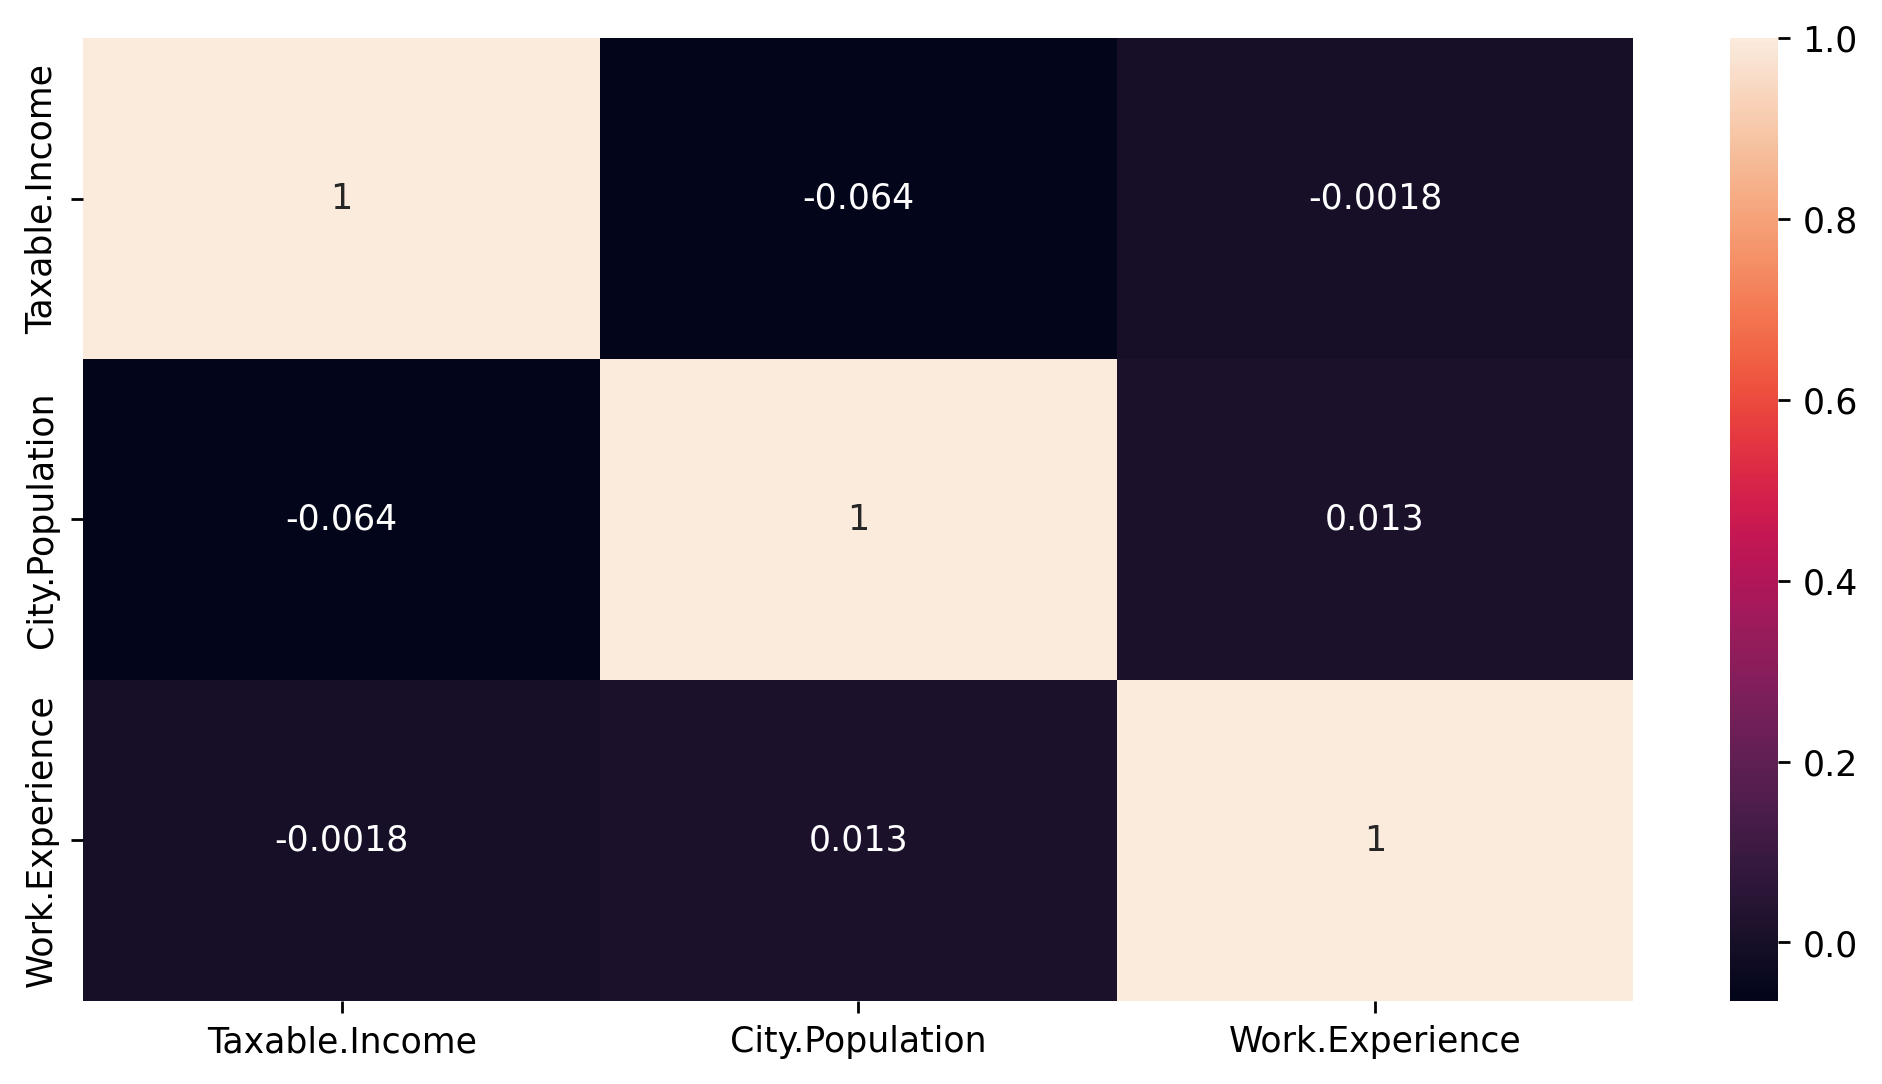

In [8]:
sns.heatmap(df.corr(),annot=True)

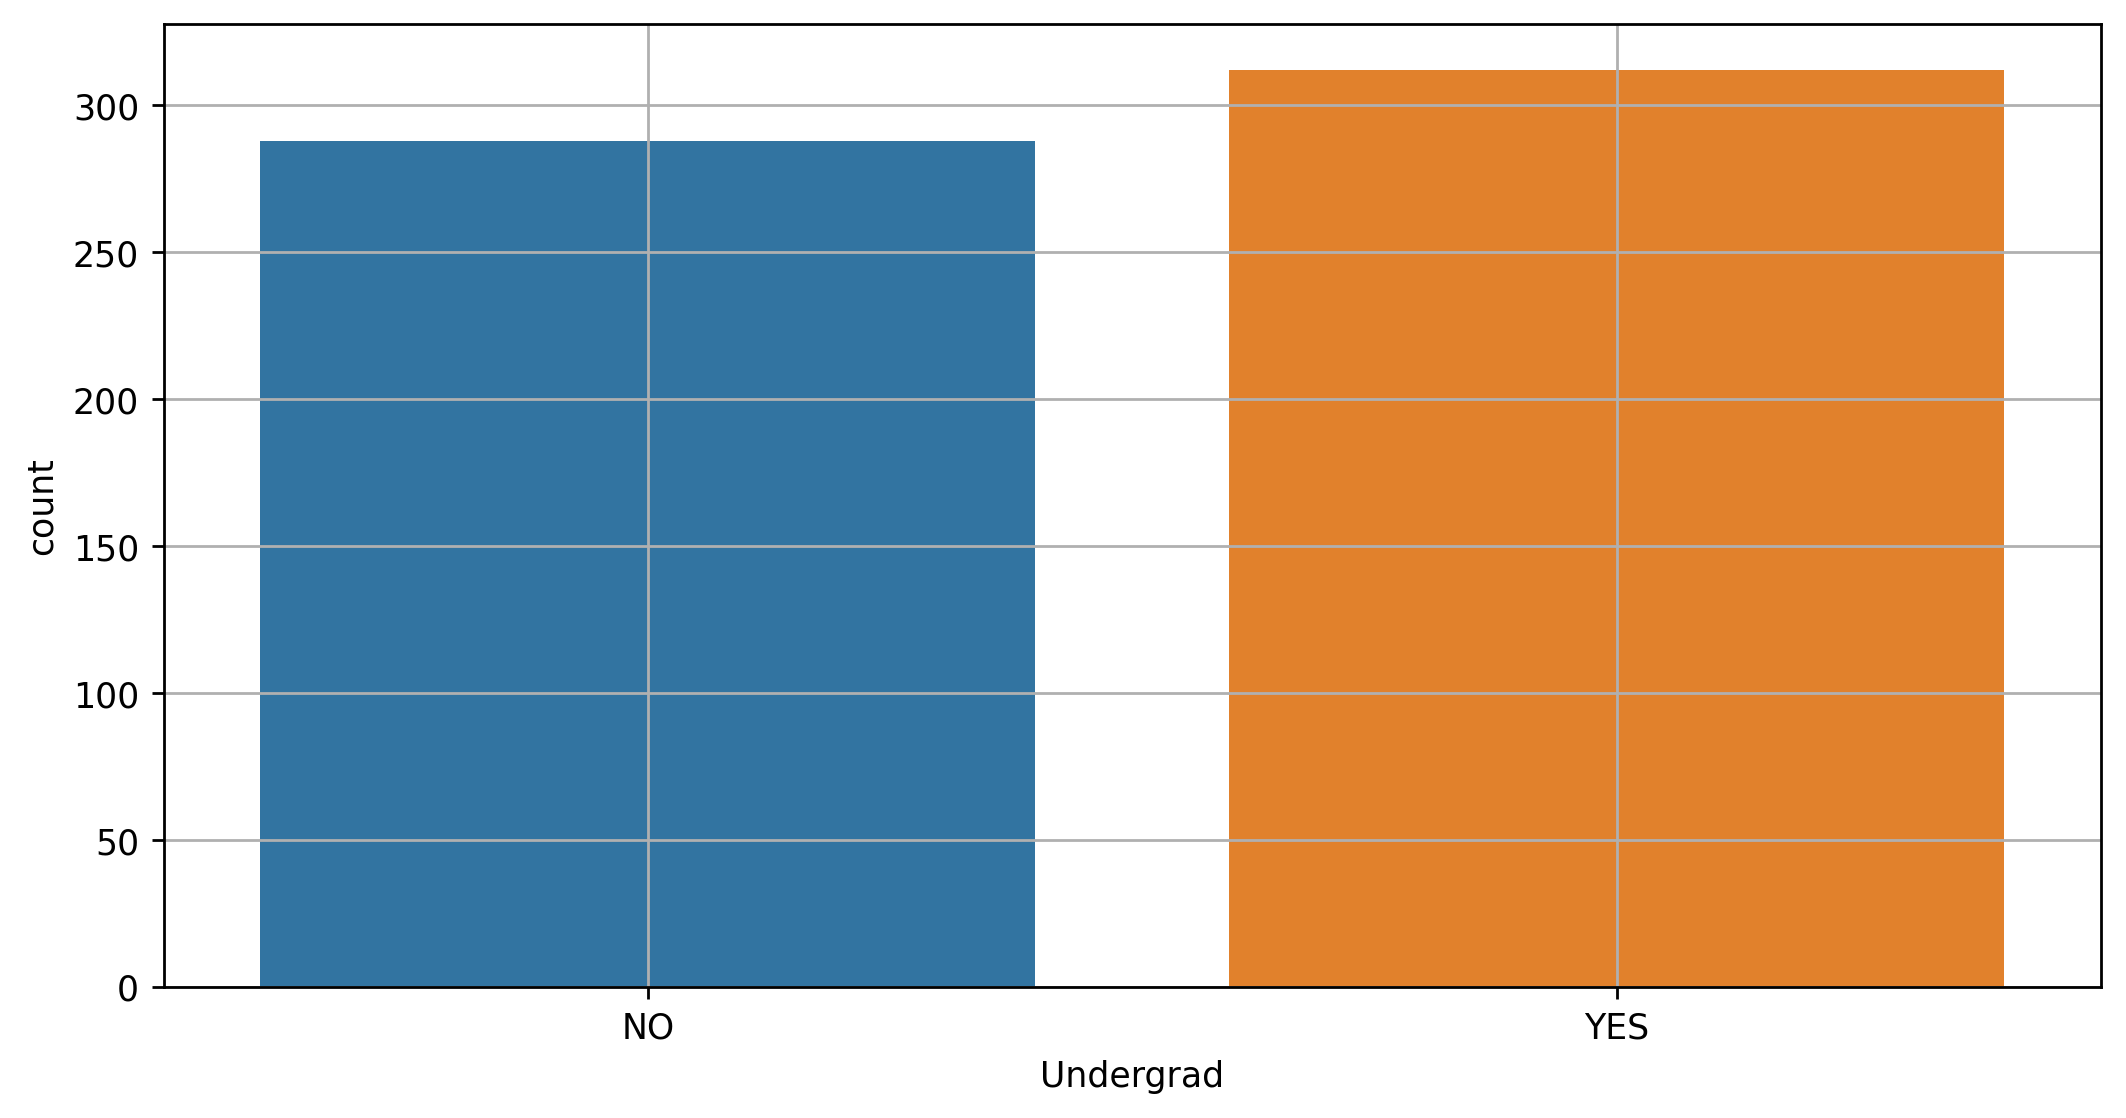

In [9]:
sns.countplot(x='Undergrad',data=df)
plt.grid()

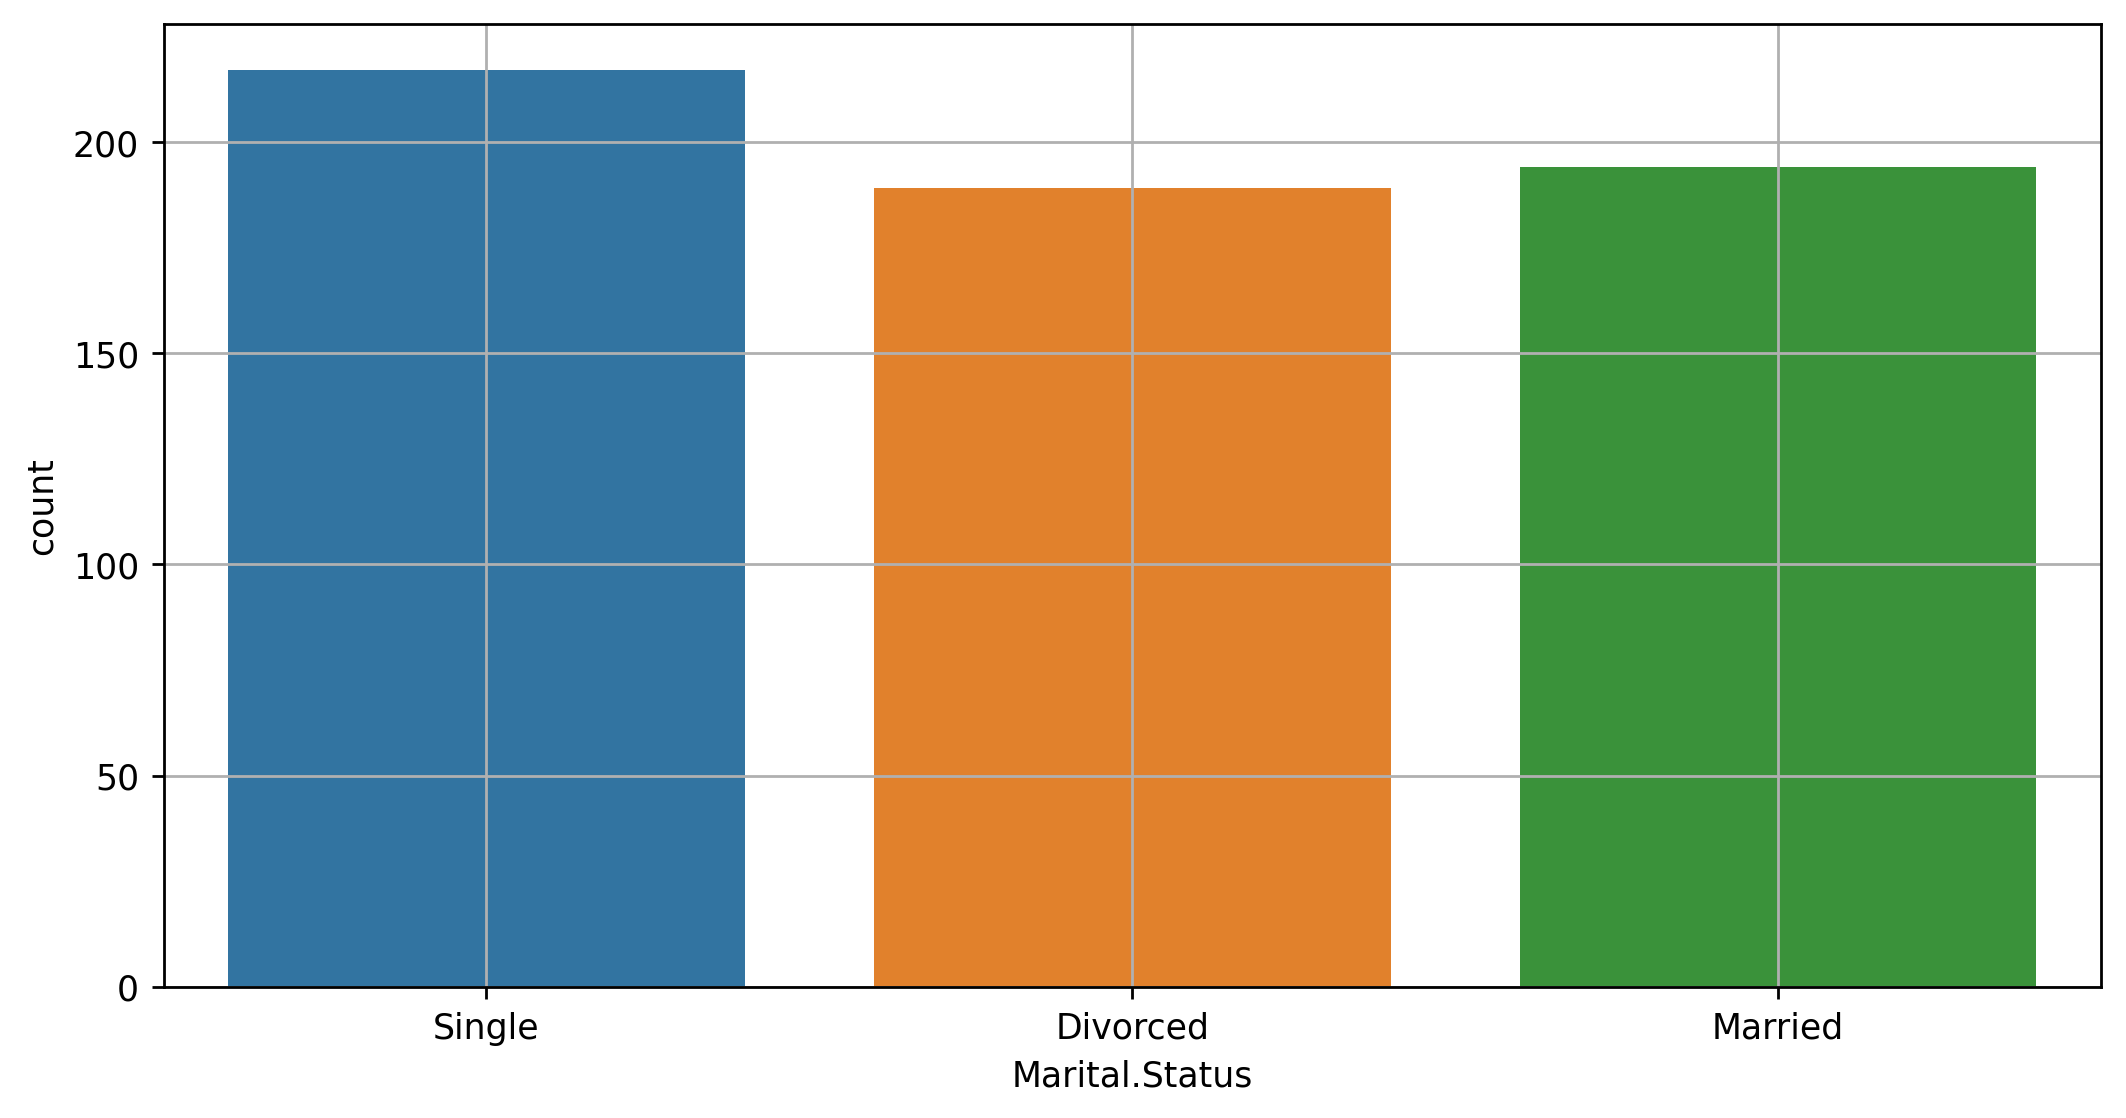

In [10]:
sns.countplot(x='Marital.Status',data=df)
plt.grid()

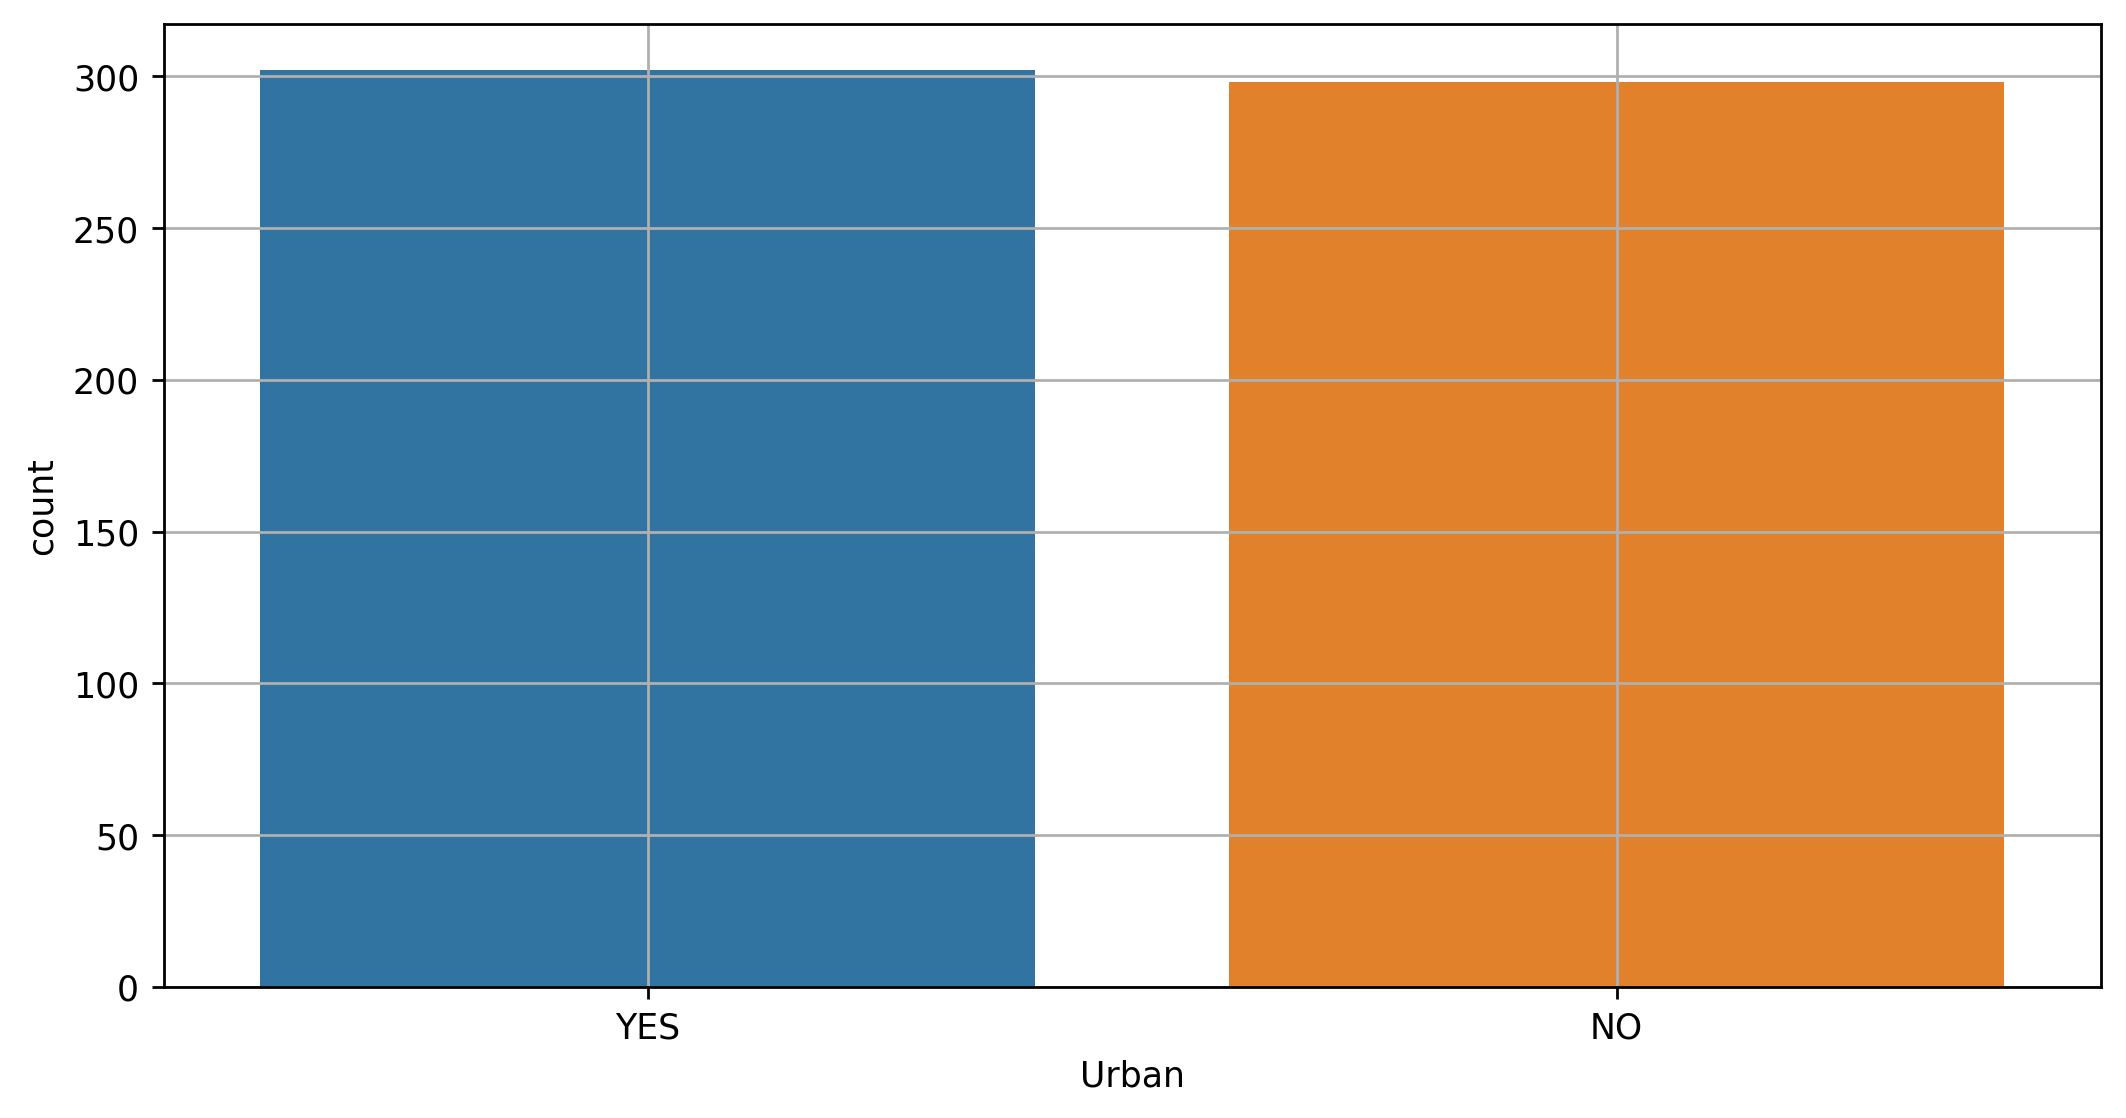

In [11]:
sns.countplot(x='Urban',data=df)
plt.grid()

In [12]:
#Convert Taxable income in categorial data

df['Taxable.Income'] = pd.cut(x=df['Taxable.Income'],bins = [10002,30000,99620], labels=['Risky','Good'])
df['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [13]:
df['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

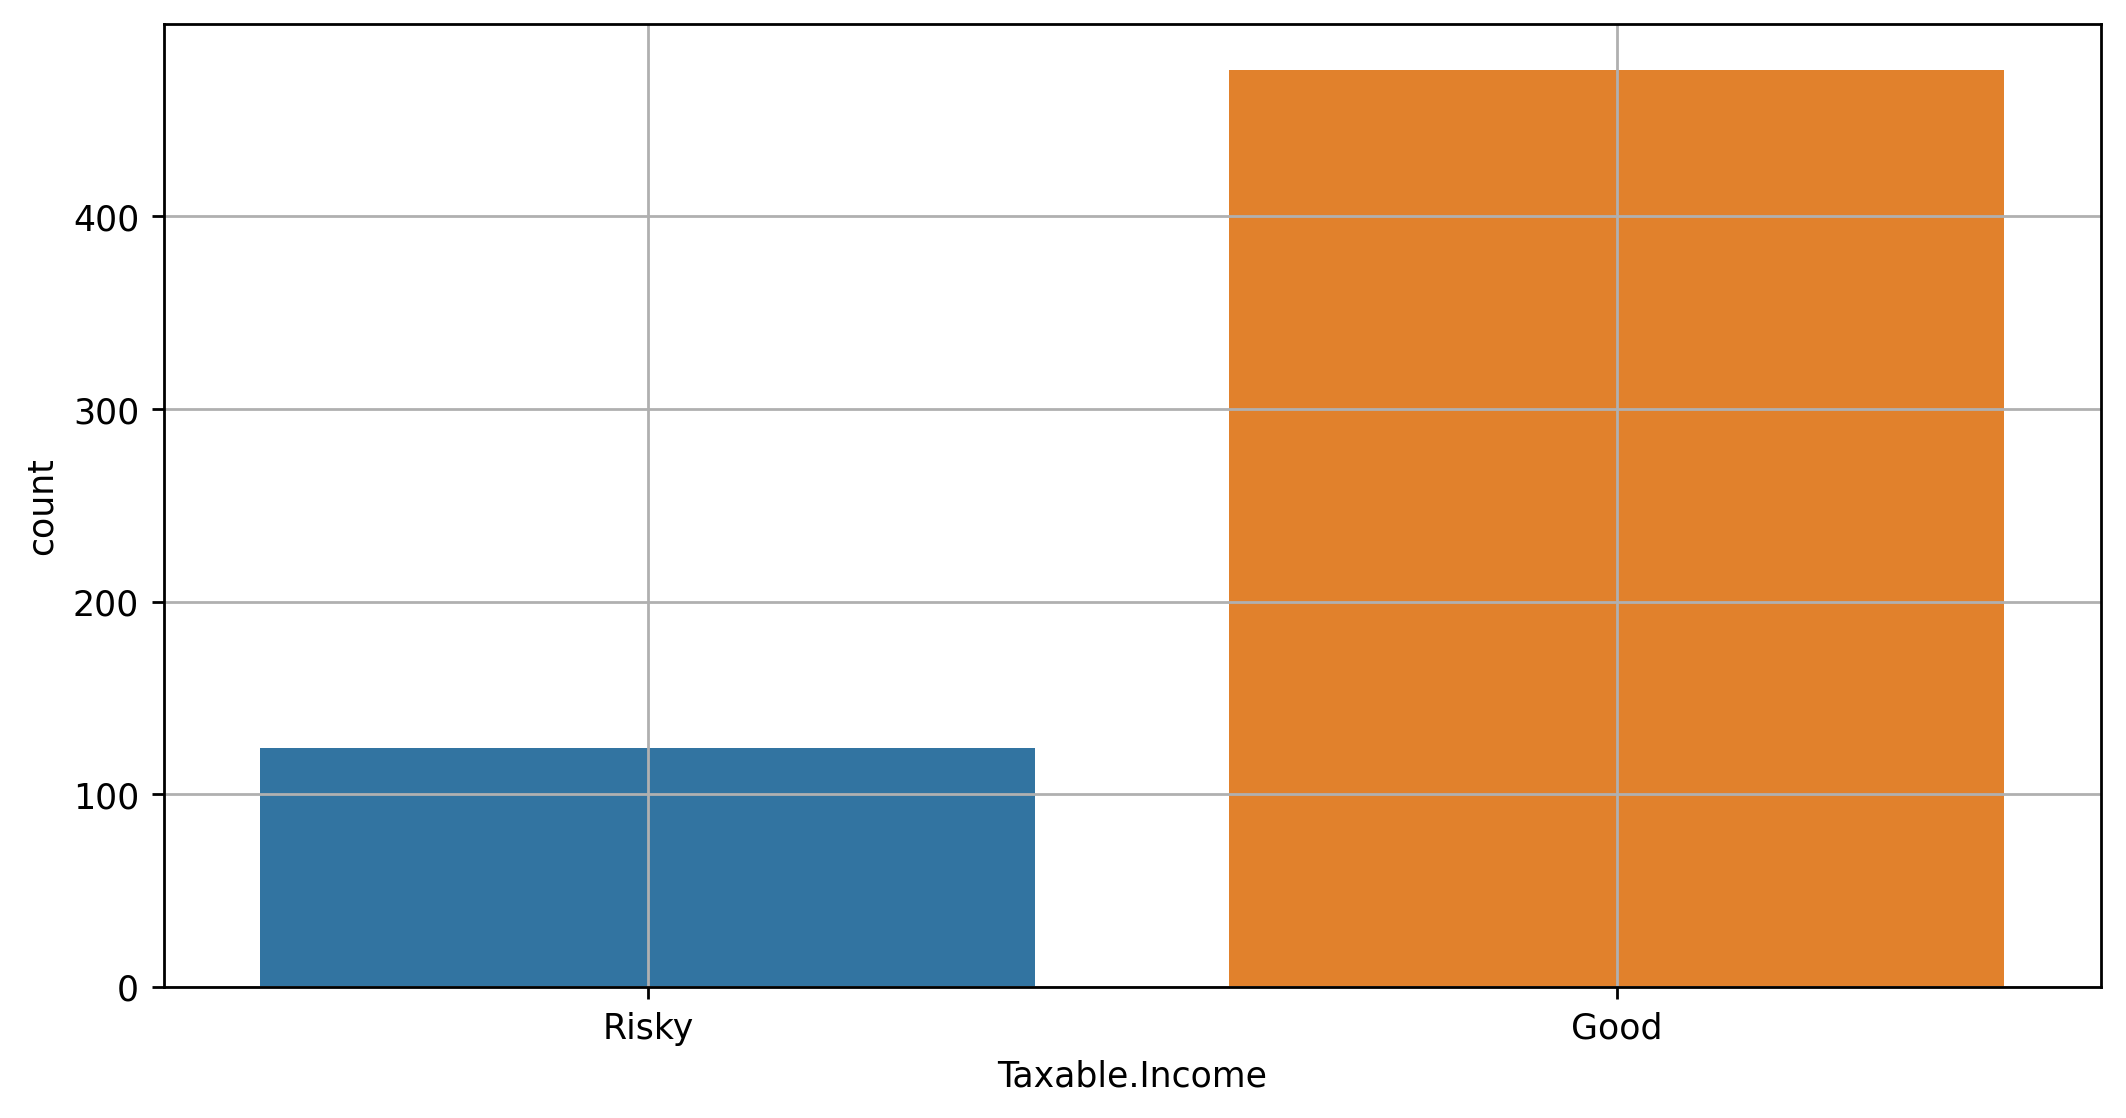

In [14]:
sns.countplot(x='Taxable.Income',data=df)
plt.grid()

In [15]:
df = pd.get_dummies(df,columns=["Taxable.Income"],drop_first=True)

In [16]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income_Good
0,NO,Single,50047,10,YES,1
1,YES,Divorced,134075,18,YES,1
2,NO,Married,160205,30,YES,1
3,YES,Single,193264,15,YES,1
4,NO,Married,27533,28,NO,1


Text(0.5, 1.0, 'Pie Chart')

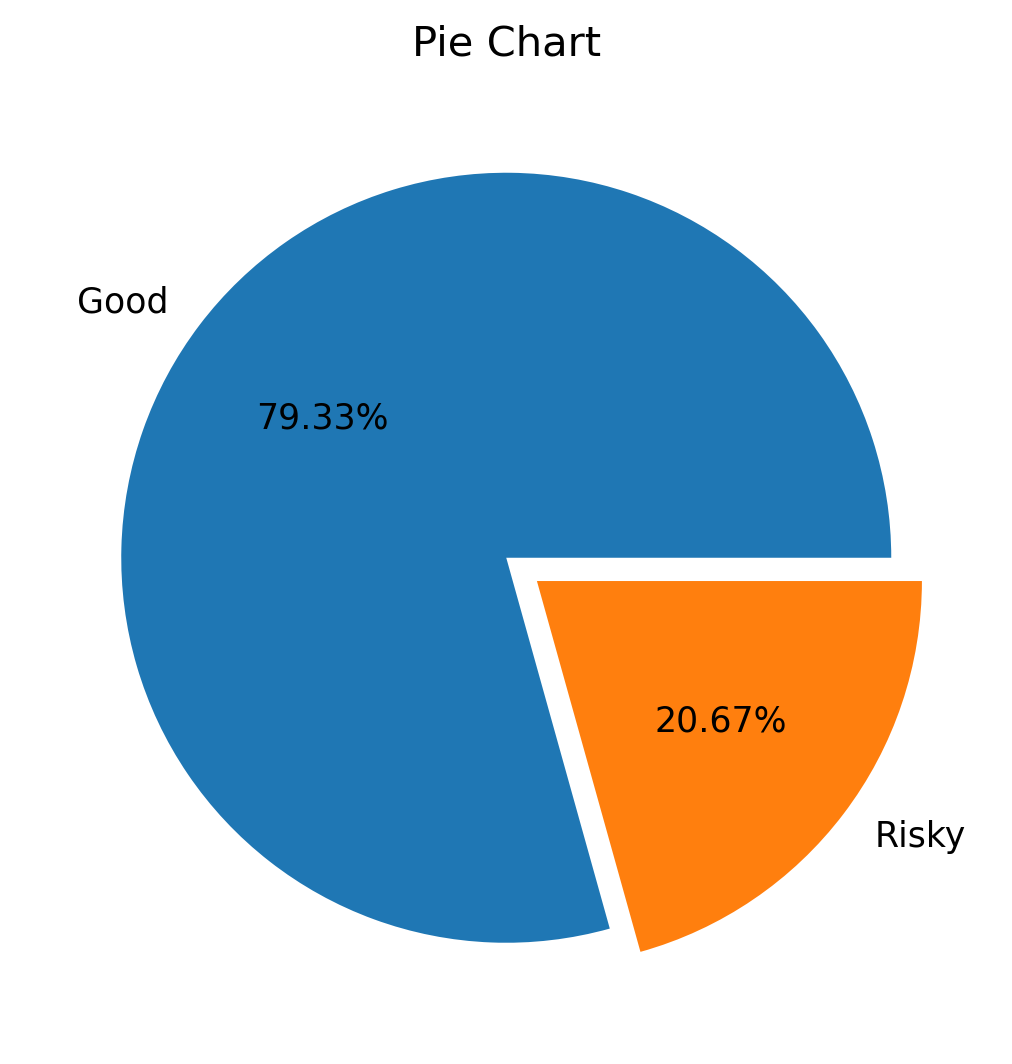

In [17]:
plt.pie(df['Taxable.Income_Good'].value_counts(),labels=['Good','Risky'],explode=(0,0.1),autopct ='%1.2f%%')
plt.title('Pie Chart')

In [18]:
#Tranforming the data

le = LabelEncoder()
oe = OrdinalEncoder()

df['Undergrad'] = oe.fit_transform(df[['Undergrad']])
df['Marital.Status'] = oe.fit_transform(df[['Marital.Status']])
df['Urban'] = oe.fit_transform(df[['Urban']])
df['Taxable.Income_Good'] = le.fit_transform(df[['Taxable.Income_Good']])

df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income_Good
0,0.0,2.0,50047,10,1.0,1
1,1.0,0.0,134075,18,1.0,1
2,0.0,1.0,160205,30,1.0,1
3,1.0,2.0,193264,15,1.0,1
4,0.0,1.0,27533,28,0.0,1


Splitting the data in training and testing

In [19]:
x = df.iloc[:,:5]
y = df['Taxable.Income_Good']

In [20]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,2.0,50047,10,1.0
1,1.0,0.0,134075,18,1.0
2,0.0,1.0,160205,30,1.0
3,1.0,2.0,193264,15,1.0
4,0.0,1.0,27533,28,0.0
...,...,...,...,...,...
595,1.0,0.0,39492,7,1.0
596,1.0,0.0,55369,2,1.0
597,0.0,0.0,154058,0,1.0
598,1.0,1.0,180083,17,0.0


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income_Good, Length: 600, dtype: int64

In [22]:
# by using 'stratify=y' , we can deal with imbalanced data

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.33, random_state = 12,shuffle=True,stratify=y)

Text(0.5, 1.0, 'Pie Chart test data')

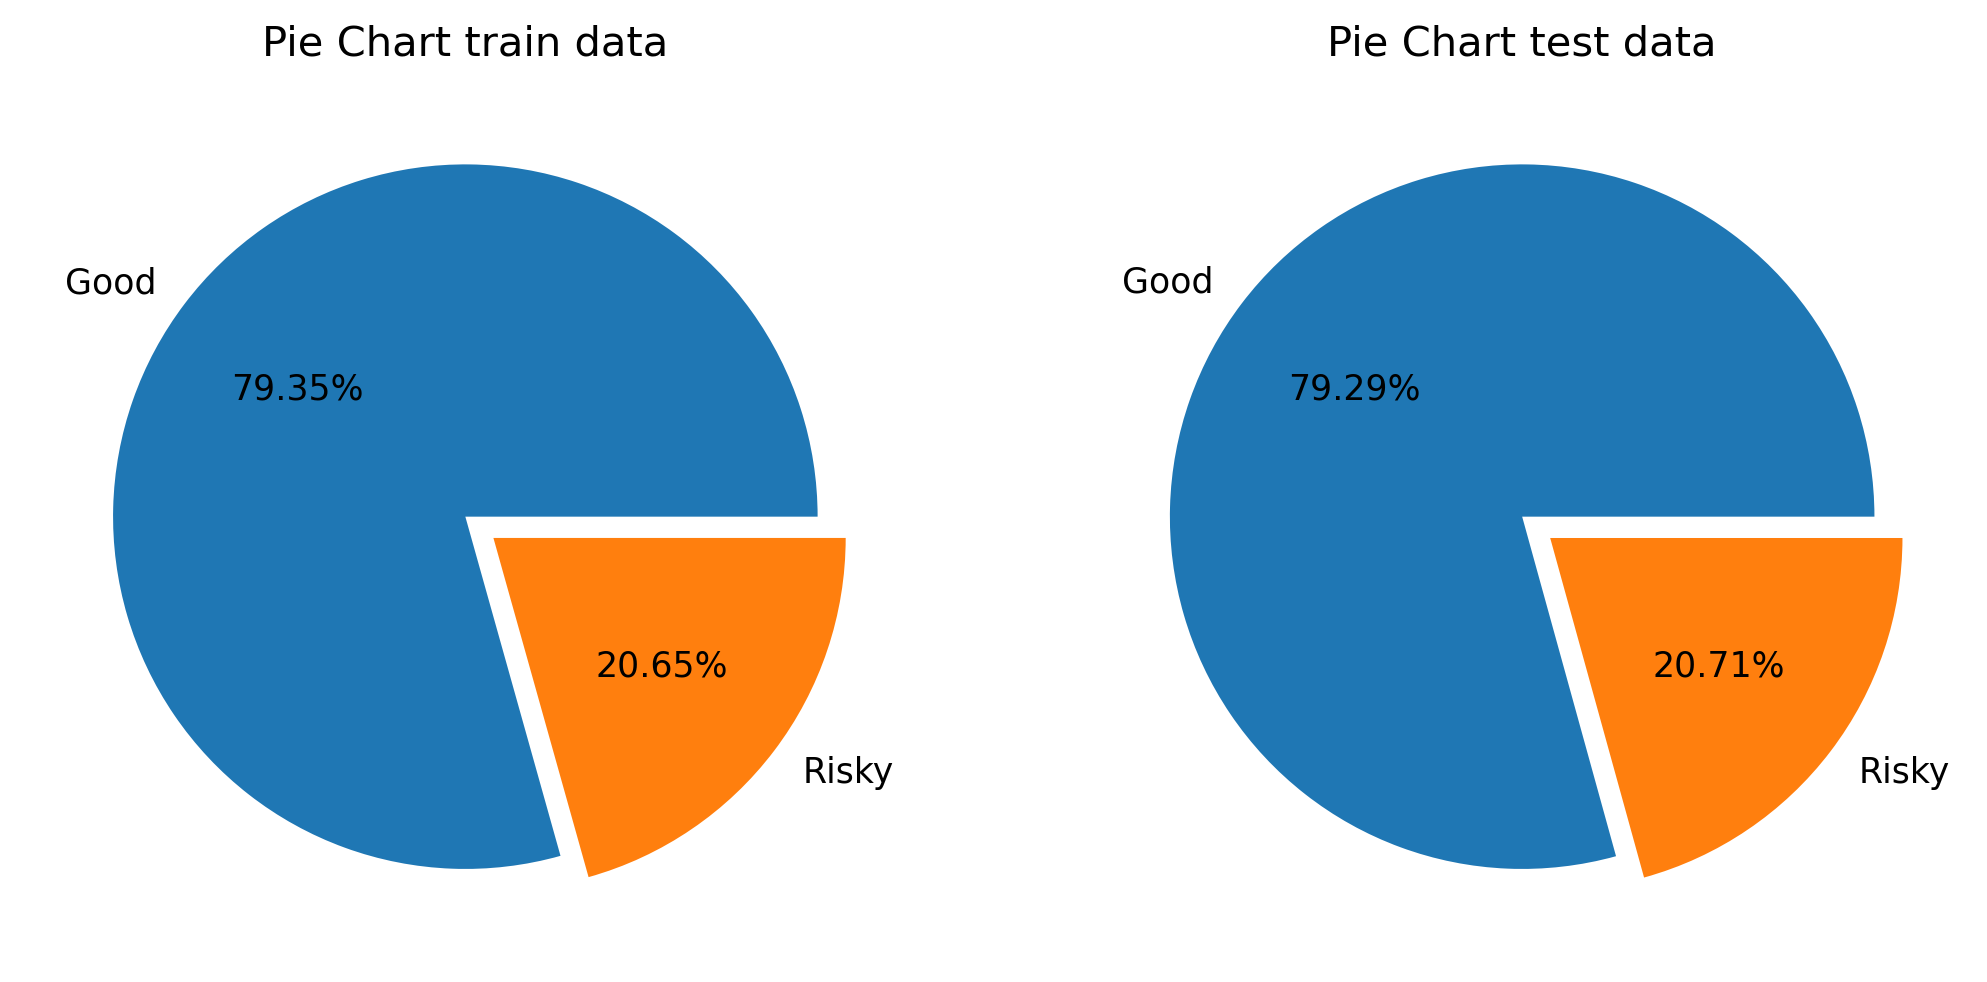

In [23]:
#train data 

ax1 = plt.subplot(121)
line1=plt.pie(ytrain.value_counts(),labels=['Good','Risky'],explode=(0,0.1),autopct ='%1.2f%%')
plt.title('Pie Chart train data')

#test data

ax2 = plt.subplot(122)
line2=plt.pie(ytest.value_counts(),labels=['Good','Risky'],explode=(0,0.1),autopct ='%1.2f%%')
plt.title('Pie Chart test data')

In [24]:
xtrain.shape , ytrain.shape

((402, 5), (402,))

In [25]:
xtest.shape , ytest.shape

((198, 5), (198,))

# Model Building

In [26]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [27]:
ypred = rfc.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [28]:
#Evaluate Model

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.20      0.07      0.11        41
           1       0.79      0.92      0.85       157

    accuracy                           0.75       198
   macro avg       0.50      0.50      0.48       198
weighted avg       0.67      0.75      0.70       198



GridSearch CV

In [29]:
params={
    'criterion' : ["gini","entropy"],
    'max_depth' : [5,7,9],
    'max_features' : ["auto","sqrt","log2"]
}

In [30]:
grid = GridSearchCV(rfc,param_grid=params,verbose=2)

In [31]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.1s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.1s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.1s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.1s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.2s
[CV] END .....criterion=gini, max_depth=5, max_features=sqrt; total time=   0.1s
[CV] END .....criterion=gini, max_depth=5, max_features=sqrt; total time=   0.1s
[CV] END .....criterion=gini, max_depth=5, max_features=sqrt; total time=   0.1s
[CV] END .....criterion=gini, max_depth=5, max_features=sqrt; total time=   0.1s
[CV] END .....criterion=gini, max_depth=5, max_features=sqrt; total time=   0.1s
[CV] END .....criterion=gini, max_depth=5, max_features=log2; total time=   0.1s
[CV] END .....criterion=gini, max_depth=5, max_f

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=2)

In [32]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}

In [33]:
rfcc = RandomForestClassifier(criterion='gini',max_depth=5,max_features='auto')

In [34]:
rfcc.fit(xtrain,ytrain)
rfcc.score(xtrain,ytrain),rfcc.score(xtest,ytest)

(0.8009950248756219, 0.7929292929292929)

Training accuracy = 80% Testing accuracy = 79%